#**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

**Introduction**

●To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

The primary objective of this analysis is to perform descriptive analytics, visualize data distributions, and preprocess the dataset to prepare it for further analysis and machine learning tasks. Descriptive analytics provides a summary of the dataset, identifying key patterns, trends, and insights. Visualization techniques help in understanding the distribution of data, highlighting any anomalies or outliers. Preprocessing steps such as standardization and one-hot encoding are crucial in transforming the data into a format suitable for analytical models.

Objectives:

Descriptive Analytics:

  Summarize the dataset to understand its basic characteristics. Identify key statistics such as mean, median, standard deviation, and interquartile ranges for numerical variables.

Data Visualization:

   Create visual representations of data distributions to identify patterns and outliers.
   Use boxplots to visualize the spread and central tendency of numerical variables.
   Use bar charts to visualize the frequency of categorical variables.

Data Preprocessing:

   Standardize numerical variables to ensure uniformity and improve model performance.
   Convert categorical variables into dummy variables (one-hot encoding) to make them suitable for machine learning algorithms.

By following these steps, we aim to gain a comprehensive understanding of the dataset and prepare it for further analytical and predictive modeling tasks. This systematic approach ensures that the data is clean, well-structured, and ready for any advanced analysis or machine learning applications.

# **Descriptive Analytics for Numerical Columns**
Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

1) Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).


In [1]:
from scipy import stats
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/April-24/main/Dataset/sales_data_with_discounts.csv',
                 index_col = 0)
df

,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Date,,,,,,,,,,,,
01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...
15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394


2)Identify numerical columns in the dataset.


In [3]:
print(df.dtypes)

Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object


In [4]:
df.select_dtypes(include=np.number)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Date,,,,,,
01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180
01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039
01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843
01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298
01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
15-04-2021,2,1300,2600,15.475687,402.367873,2197.632127
15-04-2021,6,2600,15600,17.057027,2660.896242,12939.103758
15-04-2021,2,1600,3200,18.965550,606.897606,2593.102394


In [5]:
#df.select_dtypes(include=np.number).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


**3)Calculate the mean, median, mode, and standard deviation for these columns.**

In [6]:
results = {}
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
   # mode = df[col].mode()[0][0]
    std_dev = df[col].std()

    results[col] = {
        'Mean' : mean,
        'Median' : median,
       # 'Mode' : mode,
        'Standard Deviation' : std_dev
    }
for col, stats in results.items():
    print(f"Column: {col}")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print("---------------")

Column: Volume
Mean: 5.066666666666666
Median: 4.0
Standard Deviation: 4.231602391213923
---------------
Column: Avg Price
Mean: 10453.433333333332
Median: 1450.0
Standard Deviation: 18079.90483993647
---------------
Column: Total Sales Value
Mean: 33812.83555555555
Median: 5700.0
Standard Deviation: 50535.07417255325
---------------
Column: Discount Rate (%)
Mean: 15.155241895330914
Median: 16.57776564929597
Standard Deviation: 4.22060215332551
---------------
Column: Discount Amount
Mean: 3346.499424342415
Median: 988.9337332382784
Standard Deviation: 4509.902963353998
---------------
Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.788059301853
Standard Deviation: 46358.65662406695
---------------


In [7]:
basic_stats = df.describe()

basic_stats

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


4)**Provide a brief interpretation of these statistics.**

Here's a brief interpretation of the statistics typically calculated for numerical columns in a datasets:

**Mean:**
     The mean (average) represents the central tendency of the data. It gives you an idea of the typical value in the datasets. For example, if the mean sales amount is $1000, it suggests that on average, each transaction yields $1000.

**Median:**
     The median is the middle value in the dataset when it is sorted in ascending order. It is less sensitive to extreme values (outliers) compared to the mean. If the median sales amount is $800, it means that half of the transactions have sales amounts below $800 and half have amounts above $800.

**Mode:**
     The mode is the most frequently occurring value in the dataset. It indicates the value that appears most often. For example, if the mode of a dataset of product sizes is 'Medium', it suggests that 'Medium' is the most common size sold.

**Standard Deviation:**
     The standard deviation measures the dispersion or spread of the data points around the mean. A low standard deviation indicates that the data points are close to the mean, while a high standard deviation indicates that the data points are spread out over a wider range of values.



# **Data Visualization**
●Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.



In [8]:
# Identify numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Column:")
print(numeric_columns)
print("Categorical Column:")
print(categorical_columns)

Numerical Column:
['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Column:
['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


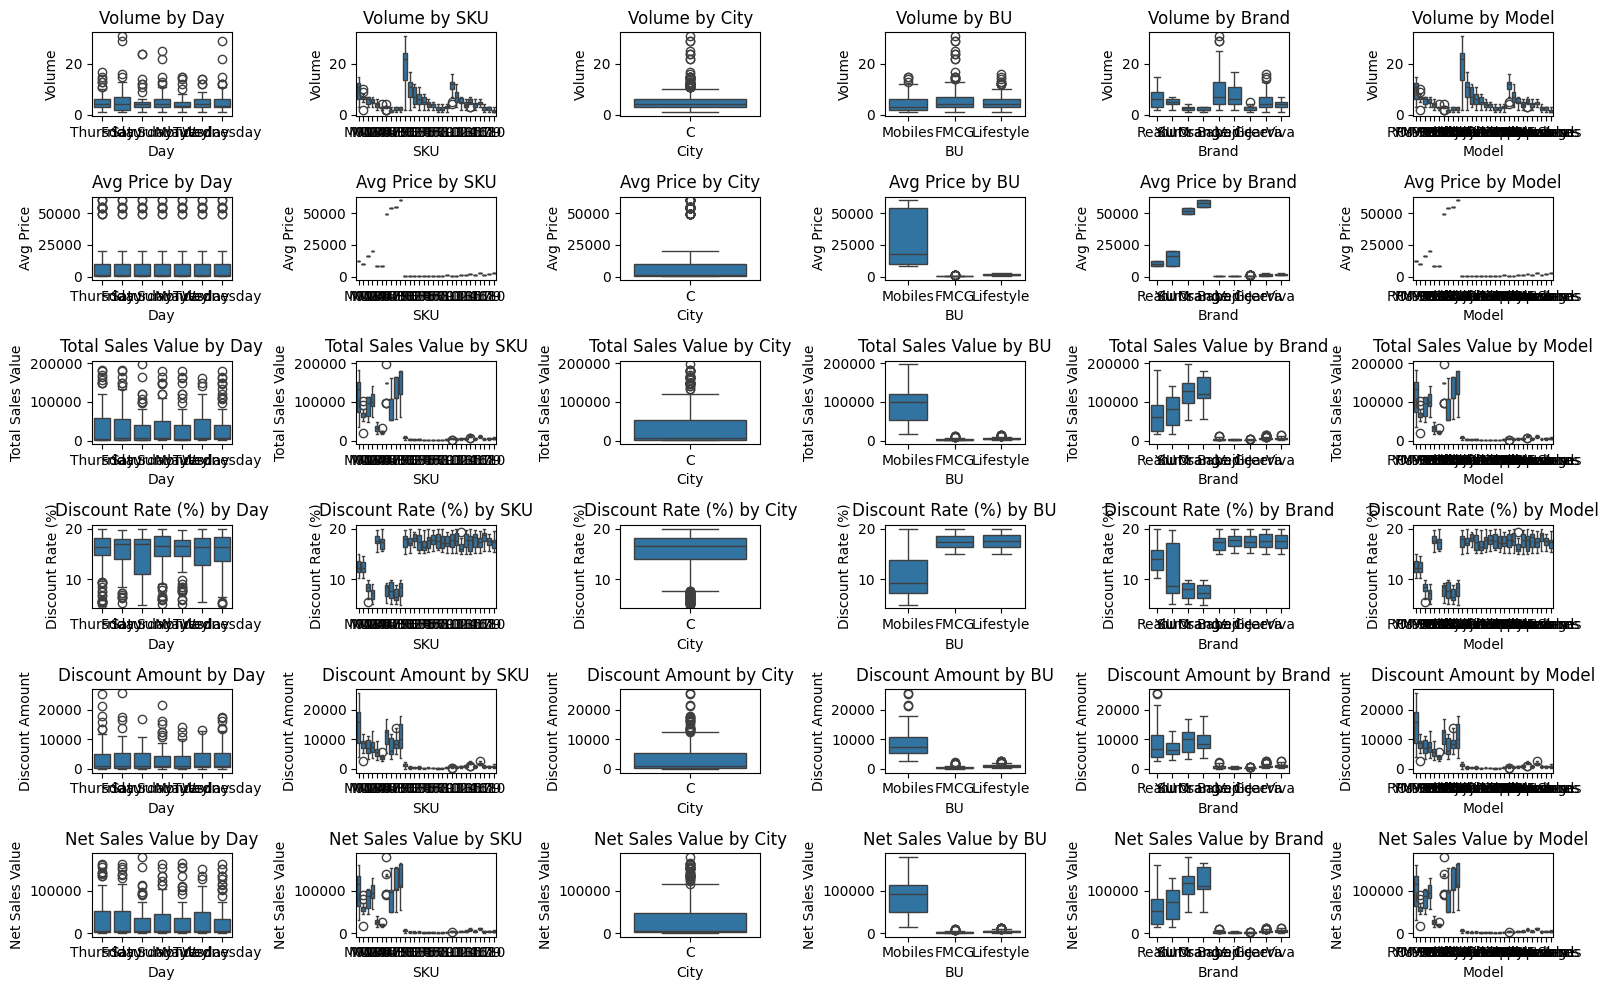

In [11]:
fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=len(categorical_columns), figsize=(16,10))

# Plot boxplots or violin plots
for i, num_col in enumerate(numeric_columns):
    for j, cat_col in enumerate(categorical_columns):
        # Boxplot or Violin plot
        sns.boxplot(x=df[cat_col], y=df[num_col], ax=axs[i, j])
        axs[i, j].set_title(f'{num_col} by {cat_col}')

plt.tight_layout()
plt.show()

**●Histograms:**

Plot histograms for each numerical column.
Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

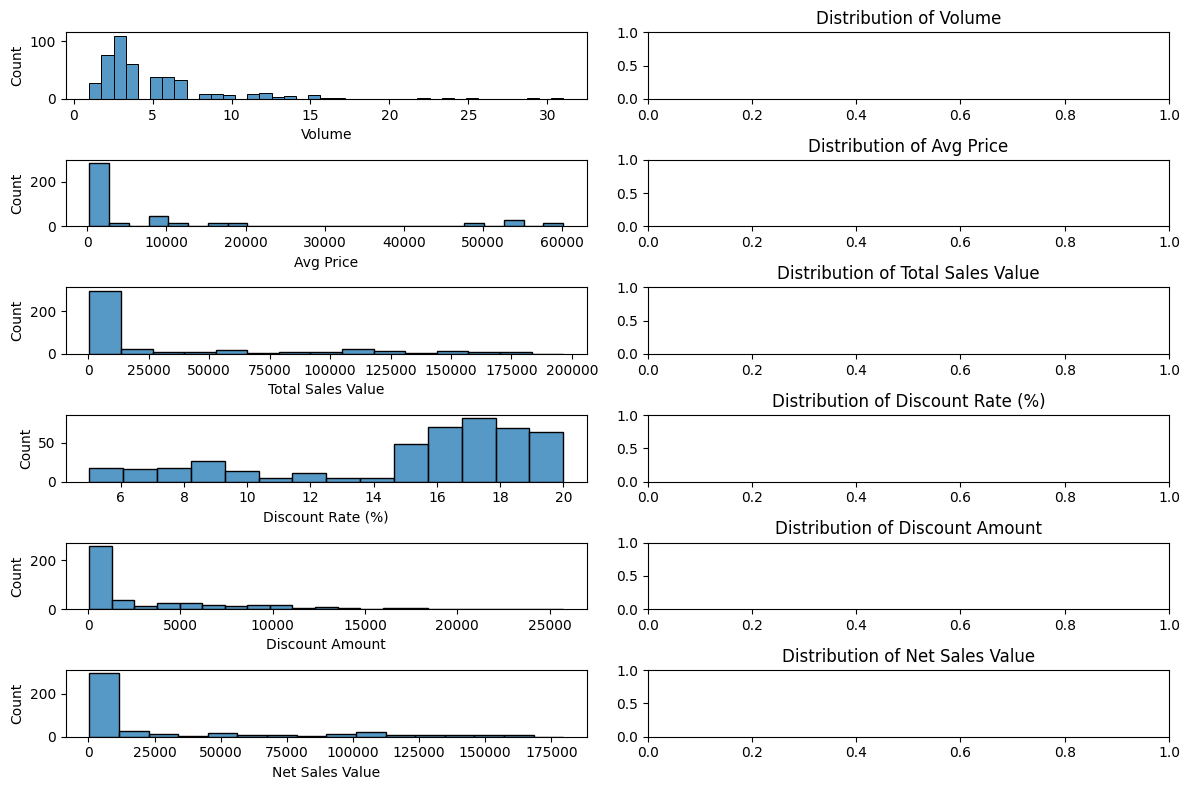

In [12]:
fig, axs = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12,8))

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=axs[i, 0])
    axs[i, 1].set_title(f'Distribution of {col}')

'''#Boxplot
    sns.boxplot(x=df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {col}')'''

plt.tight_layout()
plt.show()

**Boxplots:**

Create boxplots for numerical variables to identify outliers and the interquartile range.

Discuss any findings, such as extreme values or unusual distributions.

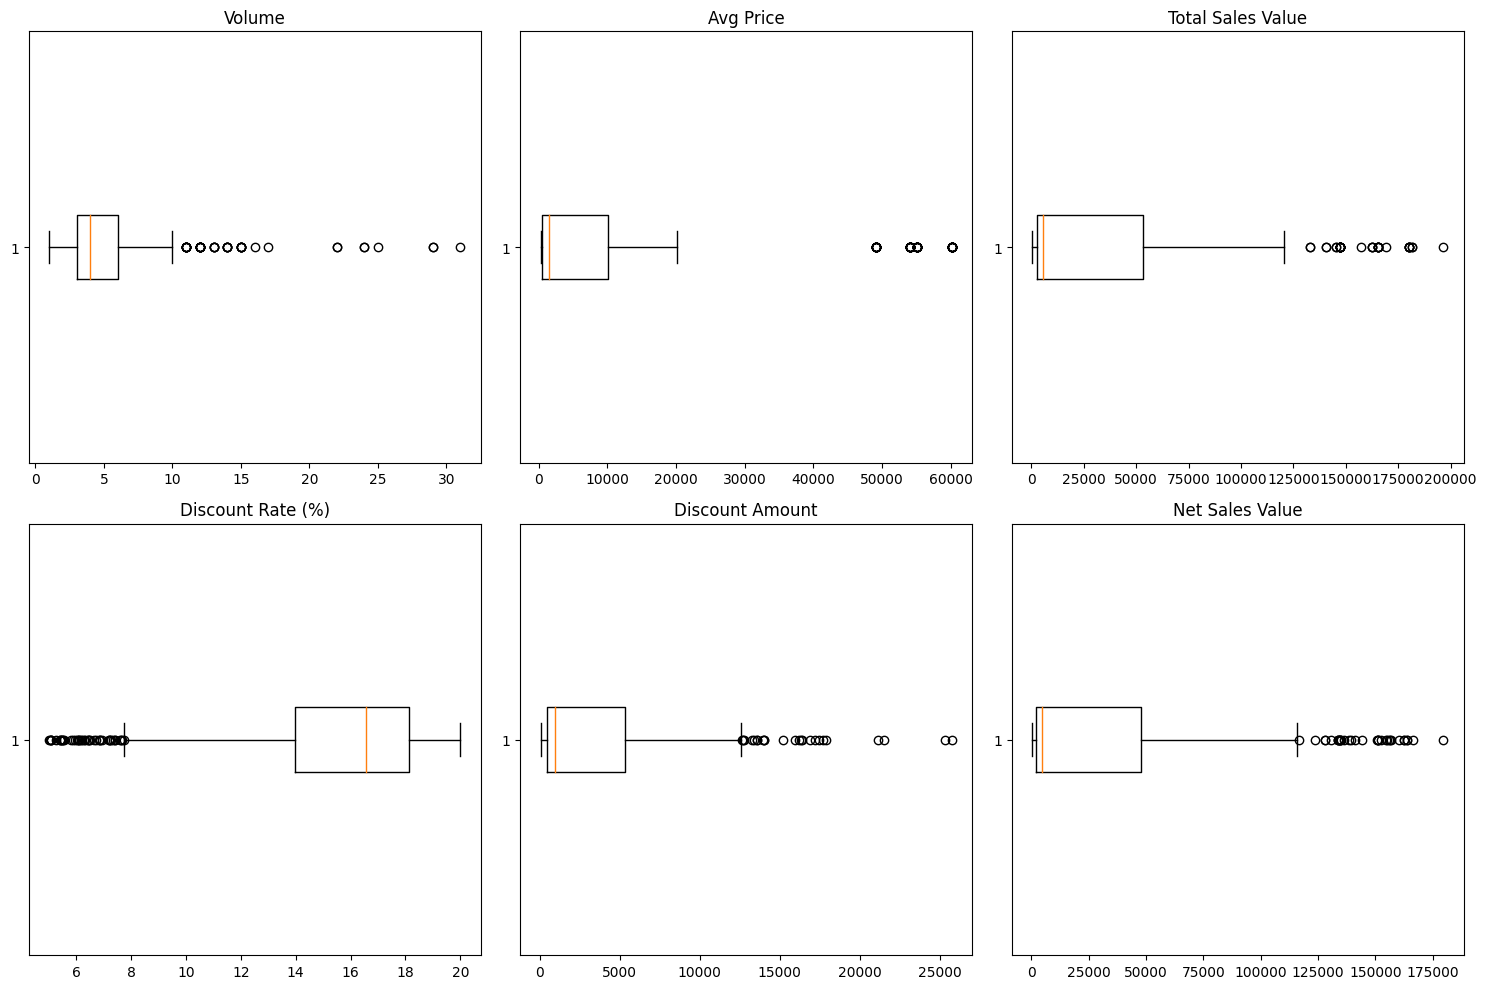

In [19]:
import matplotlib.pyplot as plt

# Select numerical columns for boxplots
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()

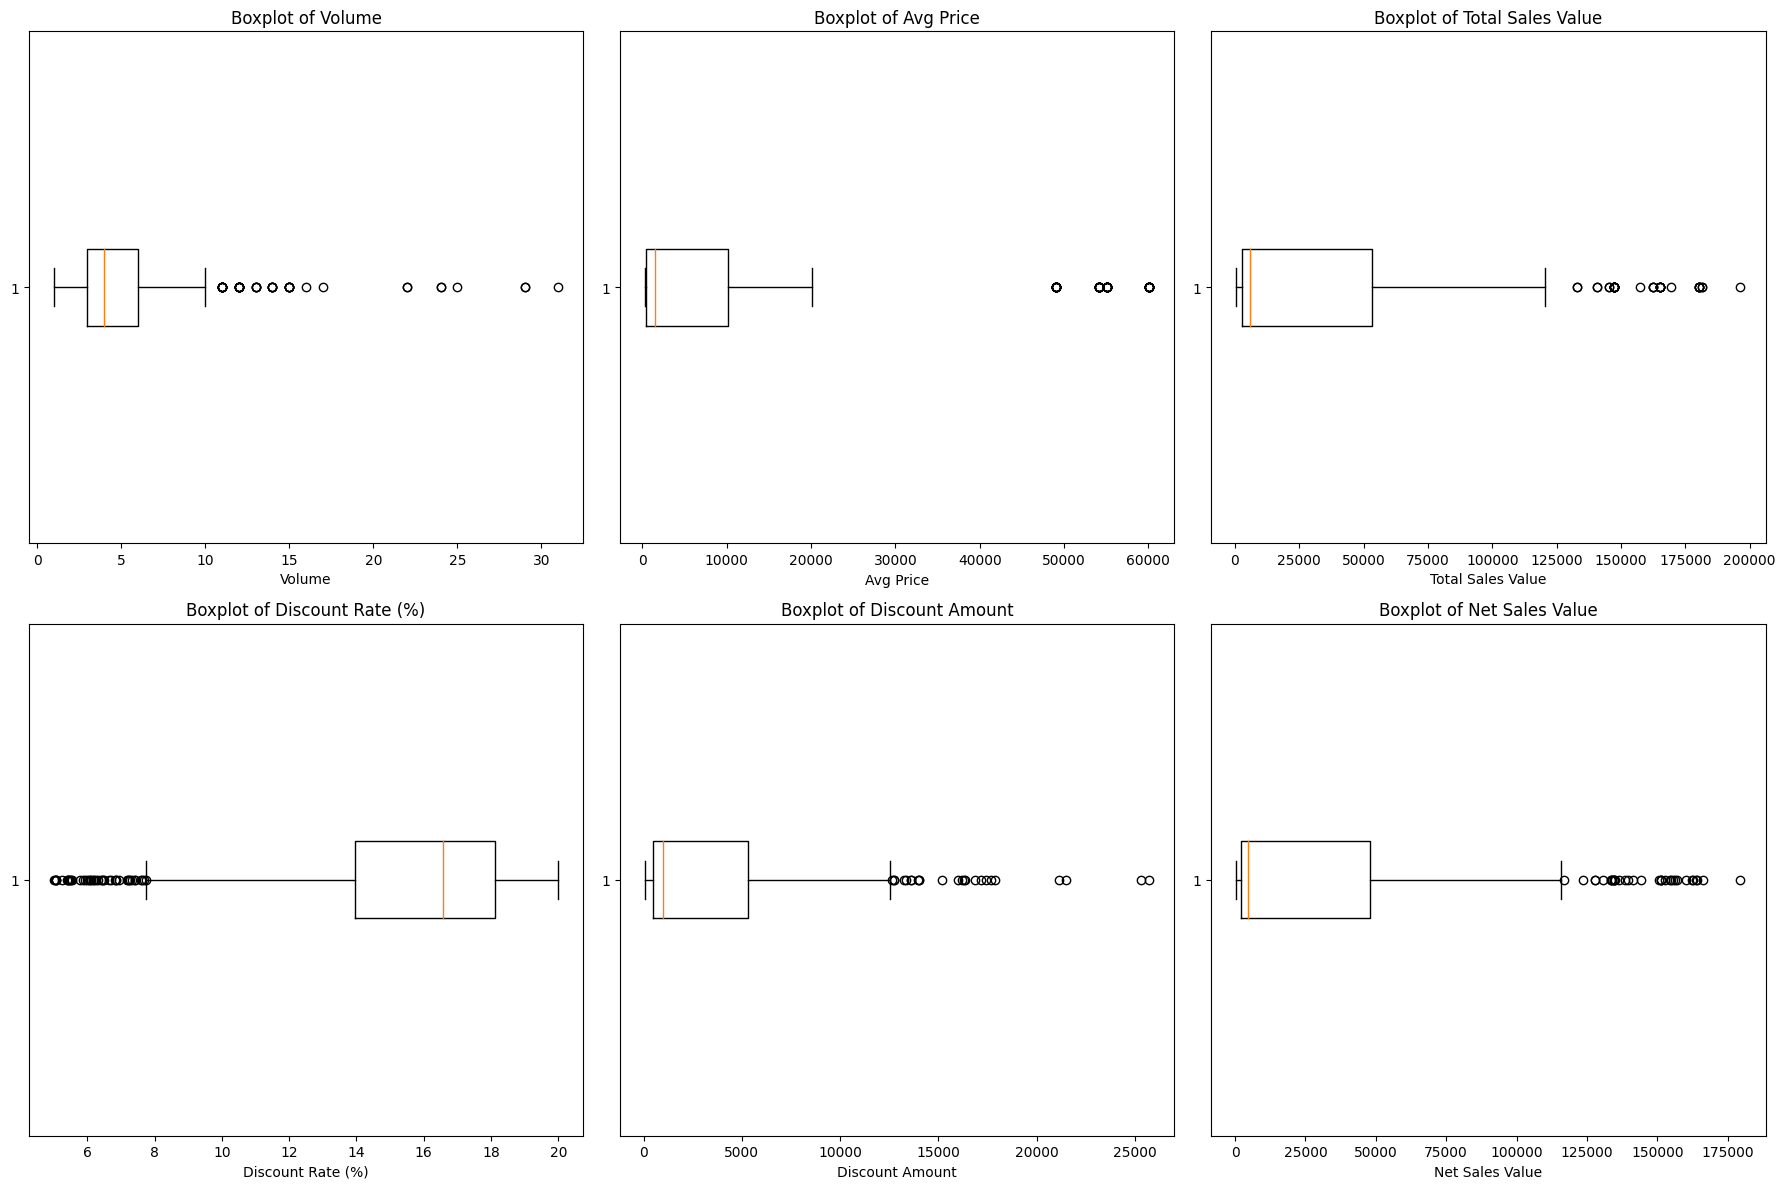

In [23]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize= (18, 12))
axes = axes.flatten()

for ax, column in zip(axes, numerical_columns):
    ax.boxplot(df[column].dropna(), vert = False)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

iqr_info = {}
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    iqr_info[column] = {
        'Q1' : Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers,
    }

In [24]:
iqr_info

{'Volume': {'Q1': 3.0,
  'Q3': 6.0,
  'IQR': 3.0,
  'Lower Bound': -1.5,
  'Upper Bound': 1.5,
  'Outliers': Date
  01-04-2021    15
  01-04-2021    10
  01-04-2021     7
  01-04-2021     6
  01-04-2021     3
                ..
  15-04-2021     6
  15-04-2021     2
  15-04-2021     6
  15-04-2021     2
  15-04-2021     3
  Name: Volume, Length: 423, dtype: int64},
 'Avg Price': {'Q1': 465.0,
  'Q3': 10100.0,
  'IQR': 9635.0,
  'Lower Bound': -13987.5,
  'Upper Bound': -4352.5,
  'Outliers': Date
  01-04-2021    12100
  01-04-2021    10100
  01-04-2021    16100
  01-04-2021    20100
  01-04-2021     8100
                ...  
  15-04-2021     1300
  15-04-2021     2600
  15-04-2021     1600
  15-04-2021     1900
  15-04-2021     3100
  Name: Avg Price, Length: 450, dtype: int64},
 'Total Sales Value': {'Q1': 2700.0,
  'Q3': 53200.0,
  'IQR': 50500.0,
  'Lower Bound': -73050.0,
  'Upper Bound': -22550.0,
  'Outliers': Date
  01-04-2021    181500
  01-04-2021    101000
  01-04-2021    112

**Bar Chart Analysis for Categorical Column:**

Identify categorical columns in the dataset.

Create bar charts to visualize the frequency or count of each category.

Analyze the distribution of categories and provide insights.

In [26]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

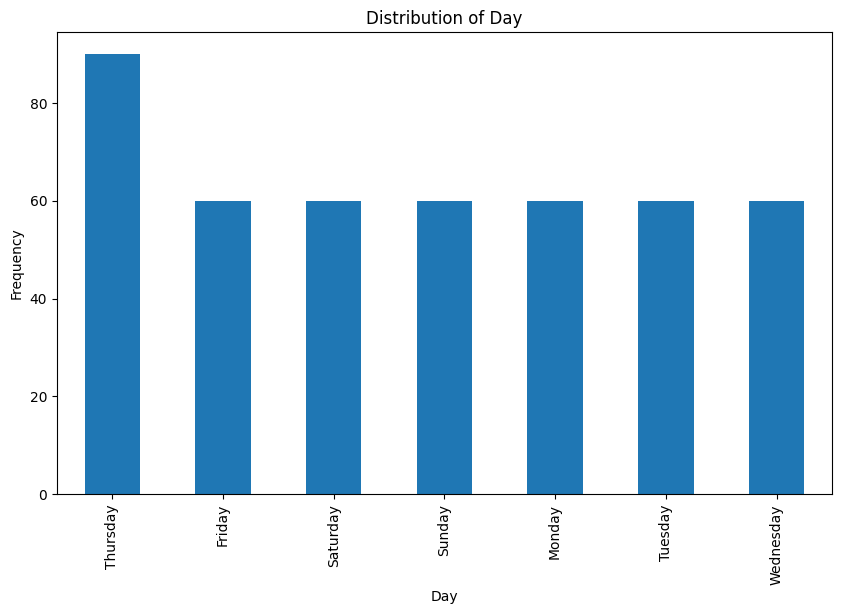

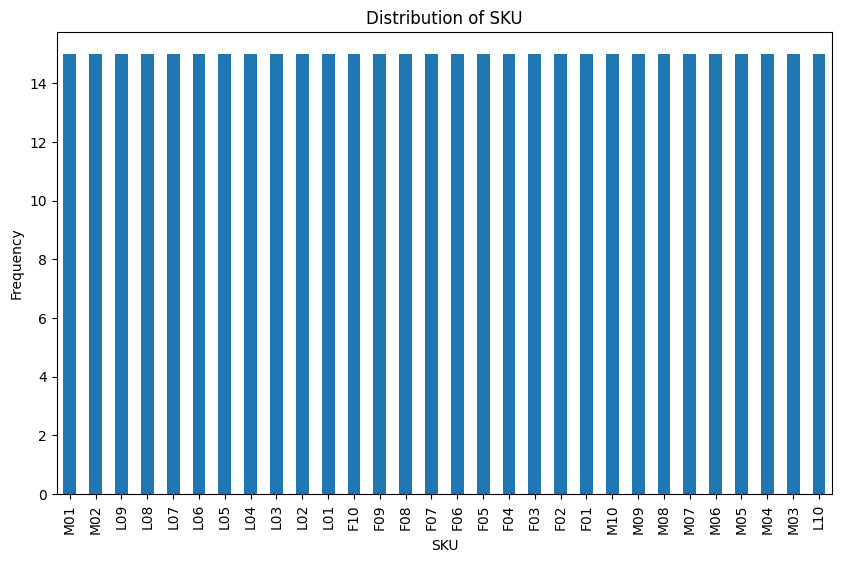

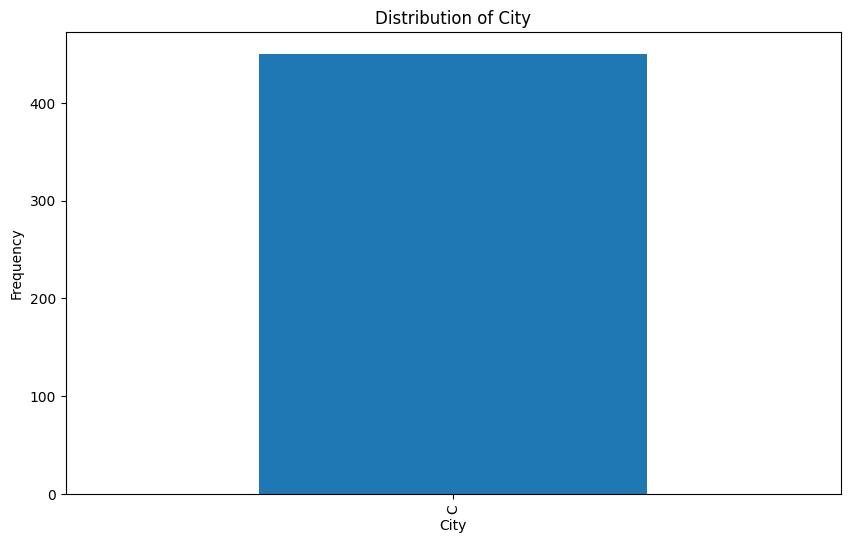

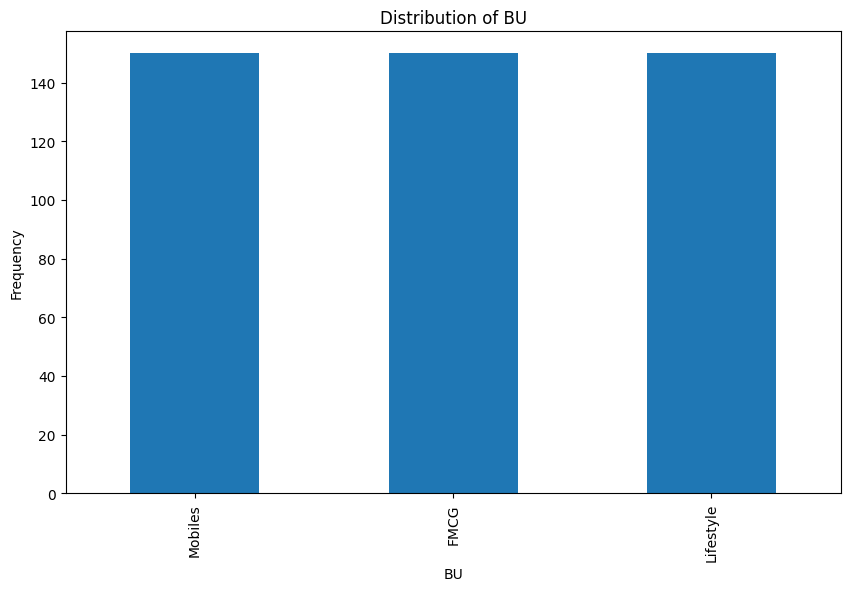

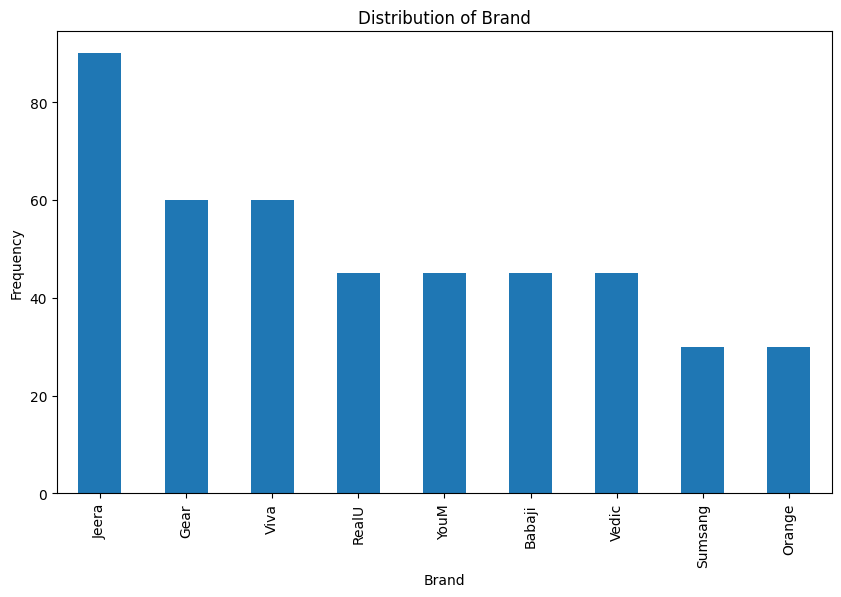

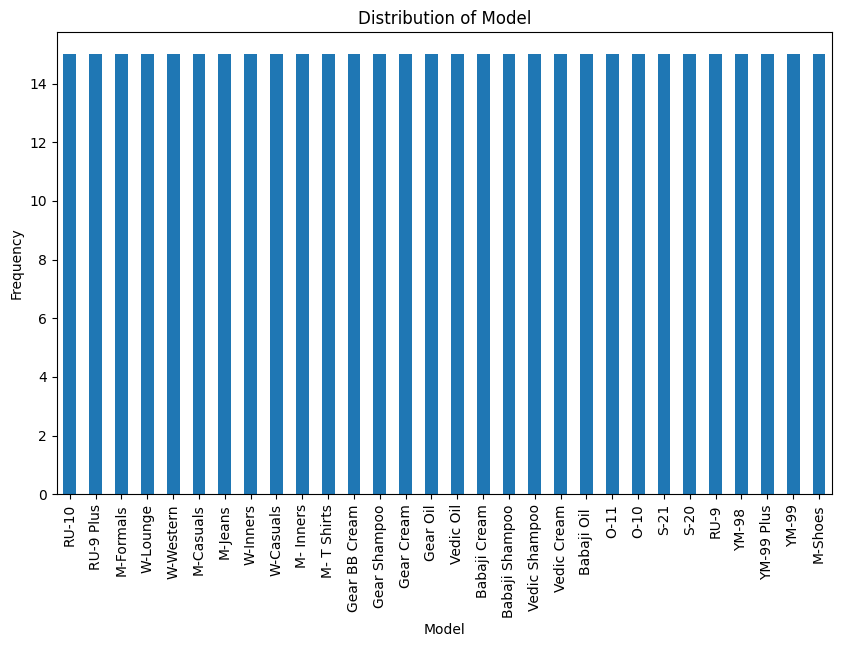

In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Create bar charts for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# **Standardization of Numerical Variables**

Explain the concept of standardization (z-score normalization).

Standardize the numerical columns using the formula: z=x-mu/sigma

**Concept of Standardization (Z-score Normalization):**

Standardization, also known as Z-score normalization, is a process of scaling numerical variables so that they have a mean (µ) of 0 and a standard deviation (σ) of 1. This transformation allows for the comparison of variables with different units and magnitudes on a common scale.

The formula for standardization is:
z = x − μ / σ​

where:

x is the original value,

μ is the mean/population of the variable,

σ is the standard deviation of the variable,

z is the standardized value.



In [29]:
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Standardize the numerical columns
standardized_data = df.copy()
for column in numerical_columns:
    mean = df[column].mean()
    std_dev = df[column].std()
    standardized_data[column] = (df[column] - mean) / std_dev

​Show before and after comparisons of the data distributions.

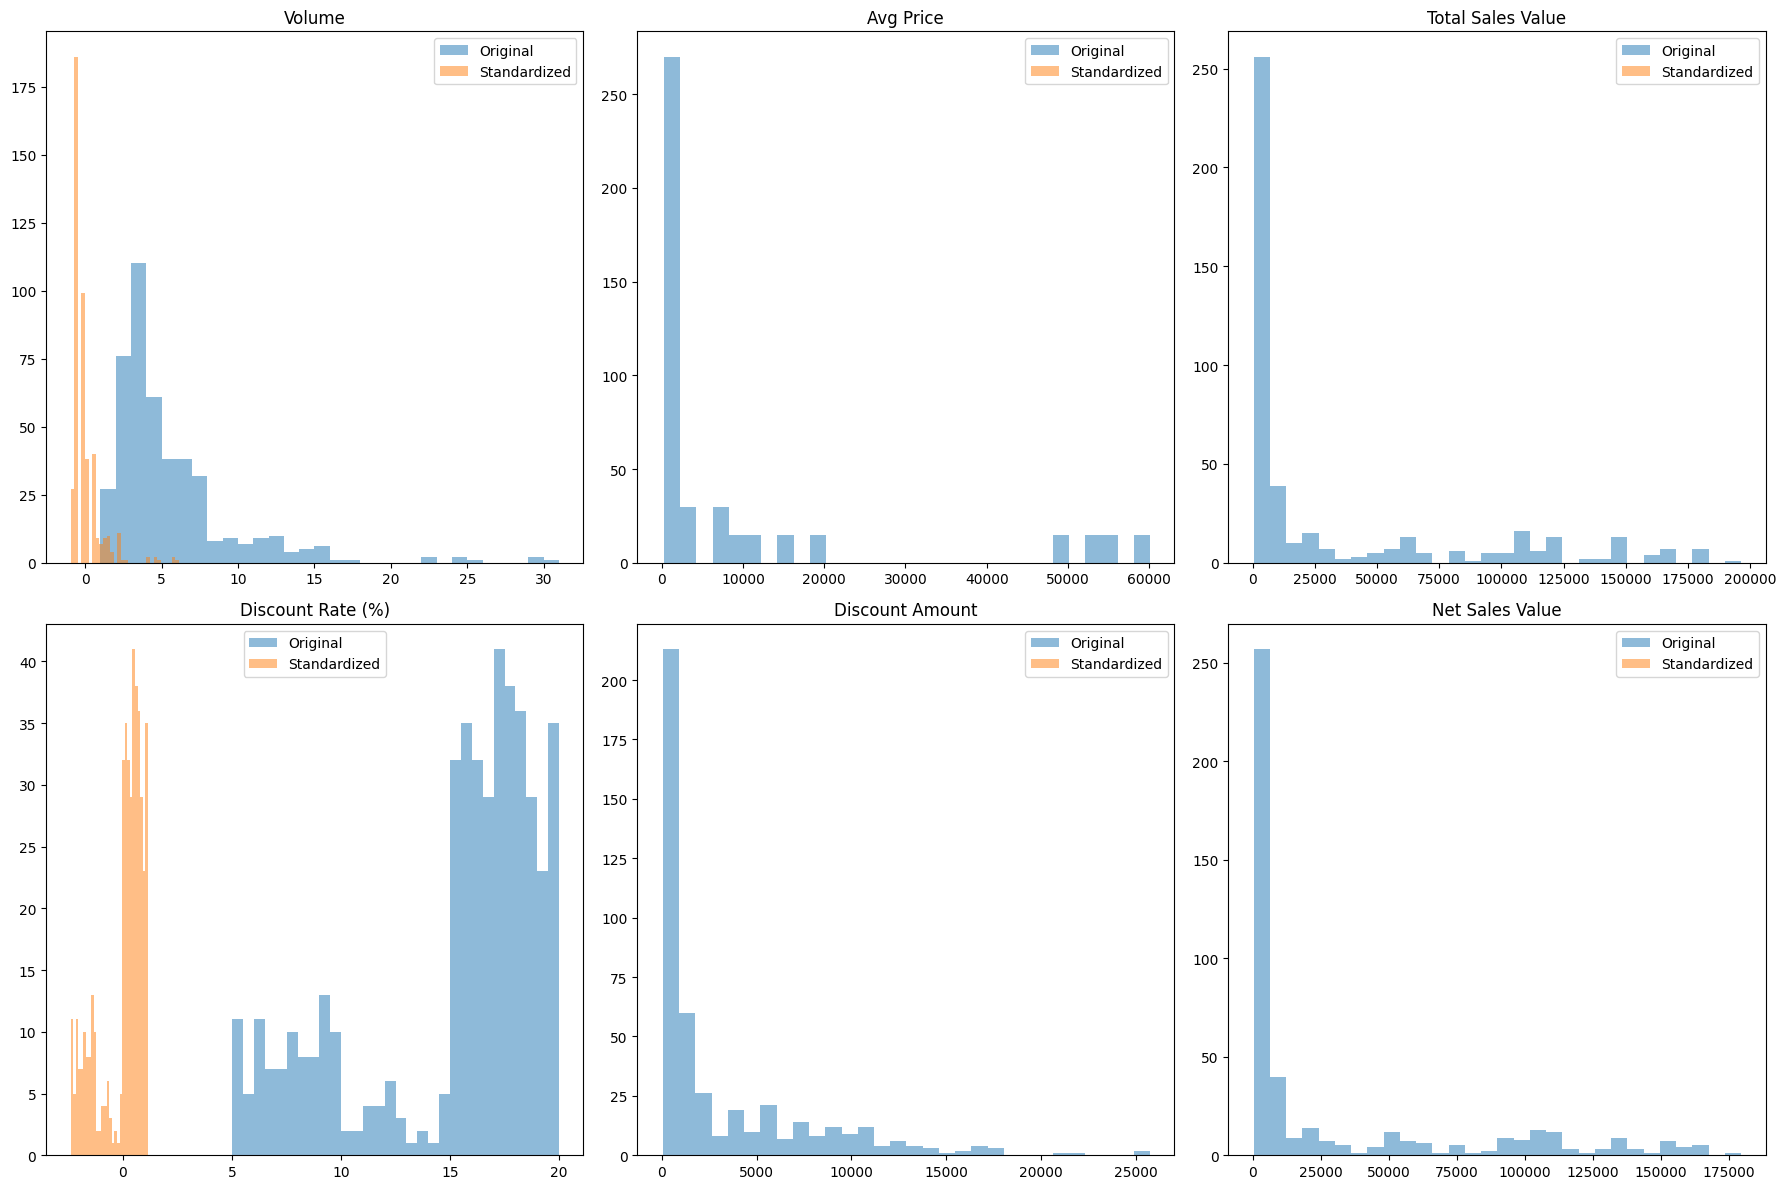

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    # Original data distribution
    axes[i].hist(df[column], bins=30, alpha=0.5, label='Original')

    # Standardized data distribution
    axes[i].hist(standardized_data[column], bins=30, alpha=0.5, label='Standardized')

    axes[i].set_title(column)
    axes[i].legend()

plt.tight_layout()
plt.show()

# **Conversion of Categorical Data into Dummy Variables**
Discuss the need for converting categorical data into dummy variables (one-hot encoding).

Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.

Display a portion of the transformed dataset.

**Need for Converting Categorical Data into Dummy Variables (One-Hot Encoding):**

Machine learning algorithms require numerical input, as they perform mathematical operations on the data. Categorical data, being non-numeric, cannot be directly used in these models. One-hot encoding addresses this issue by converting categorical variables into a series of binary (0 or 1) columns, each representing a unique category. This transformation allows ML algorithms to process categorical information effectively.

In [34]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
encoded_data = pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
encoded_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
Date,,,,,,,,,,,,,,,,,,,,,
01-04-2021,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01-04-2021,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01-04-2021,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
01-04-2021,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
01-04-2021,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15-04-2021,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15-04-2021,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
15-04-2021,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


One-hot encoding is a crucial step in preparing categorical data for machine learning models. It converts categorical variables into a format that models can process, ensuring that each category is represented accurately without introducing ordinal relationships. This transformation improves the dataset’s suitability for various analytical and machine learning tasks.

# **Conclusion**
●Summarize the key findings from the descriptive analytics and data visualizations.

●Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

**Key Findings from Descriptive Analytics and Data Visualizations**

Volume:

The sales volume exhibits a symmetric distribution with a few extreme values on both ends, indicating occasional very high or low sales volumes.

Avg Price:

The average price shows a right-skewed distribution with several high-priced outliers, suggesting the presence of premium products or special editions.

Total Sales Value:

The total sales value also exhibits a right-skewed distribution with significant outliers on the upper end, likely due to bulk purchases or high-value items.

Discount Rate (%):

Most discount rates fall within a typical range, but some unusually high or low values indicate special promotions or clearance sales.

Discount Amount:

The discount amount shows a right-skewed distribution with several high-value outliers, indicating substantial promotional offers or discounts on high-value items.

Net Sales Value:

The net sales value shows a right-skewed distribution with noticeable high-value outliers, likely influenced by high-volume or high-value sales.

**Importance of Data Preprocessing Steps**

Standardization:

Purpose: Standardization scales numerical variables to have a mean of 0 and a standard deviation of 1. This is essential for algorithms that rely on distance measures (e.g., k-nearest neighbors, SVM) and ensures that all variables contribute equally to the analysis.

Impact: Standardizing the data improves the performance of machine learning models by enhancing numerical stability and convergence speed during training.


One-Hot Encoding:

Purpose: One-hot encoding converts categorical variables into binary columns, enabling them to be used in mathematical models. This avoids introducing ordinal relationships where none exist and ensures that categorical data is represented accurately.

Impact: One-hot encoding is crucial for algorithms that cannot handle categorical data directly. It ensures that categorical information is retained and correctly interpreted by the model, leading to better performance and more accurate predictions.

Summary:

Data preprocessing is a vital step in the data analysis and machine learning pipeline. Standardization and one-hot encoding are two critical techniques that transform raw data into a format suitable for analytical models. Standardization ensures numerical uniformity, improving model performance, while one-hot encoding accurately represents categorical data, preventing misinterpretation by algorithms. By applying these preprocessing steps, we enhance the quality and suitability of the dataset, leading to more reliable and interpretable analysis outcomes.